참 거짓 판단장치
===
로지스틱 회귀
---
### 1. 로지스틱 회귀의 정의
* 전달받은 정보를 놓고 참과 거짓 중에 하나를 판단해 다음 단계로 넘기는 장치들이 딥러닝 내부에서 쉬지 않고 작동함
* 딥러닝을 수행한다는 것은 겉으로 드러나지 않는 '미니 판단 장치'들을 이용해서 복잡한 연산을 해낸 끝에 최적의 예측 값을 내놓는 작업
* 참인지 거짓인지를 구분하는 로지스틱 회귀의 원리를 이용해 '참, 거짓 미니 판단 장치'를 만들어, 주어진 입력 값의 특징을 추출함(학습, train). 이를 저장해서 '모델(model)'을 만듦.
* 누군가 비슷한 질문을 하면 지금까지 만들어 놓은 이 모델을 꺼내어 답을 함(예측, prediction) 이것이 딥러닝의 동작 원리.
* 직선으로 해결하기에는 적절하지 않은 경우도 있음.
  * 점수가 아니라 오직 합불만 발표되는 시험이 있다고 가정함.
    * 합격을 1, 불합격을 0이라고 하고, 좌표평면 상에서 나타내면 직선으로 분포를 나타내기 어려움.
    * 점들의 특성을 정확하게 담아내려면 직선이 아닌 S자 형태가 필요 $\rarr$ 시그모이드 함수 등
* 로지스틱 회귀 :   
  선형 회귀와 마찬가지로 적절한 선을 그려가는 과정
  * 다만 직선이 아니라, 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어주는 작업.
### 2. 시그모이드 함수
* 시그모이드 함수(sigmoid function) : S자 형태로 그래프가 그려지는 함수 $\rarr$ 로지스틱 회귀를 위해서는 시그모이드 함수가 필요
$$Sigmoid : y = \frac{1}{1+e^{-(ax+b)}}$$
  * a는 그래프의 경사도를 결정함.
    * a값이 커지면 그래프의 경사가 커지고, a값이 작아지면 그래프의 경사가 작아짐.  
  * b는 그래프의 좌우 이동을 결정함. 
    * b값이 커지면 그래프가 왼쪽으로 이동하고, b값이 작아지면 그래프가 오른쪽으로 이동함. 
### 3. 오차 공식
* a와 오차와의 관계 :
  * a가 작아질수록 오차는 무한대로 커짐
  * 하지만 a가 커진다고 해서 오차가 없어지지는 않음.
* b와 오차와의 관계:
  * b값이 너무 작아지거나 커지면 오차도 이에 따라 커짐.
* 시그모이드 함수에서 a, b 값을 구하는 방법 역시 경사하강법.
  * 경사 하강법은 먼저 오차를 구한 다음 오차가 작은 쪽으로 이동시키는 방법이므로 여기서도 오차(예측값과 실제 값의 차이)를 구하는 공식이 필요.
### 4. 로그 함수
* 시그모이드 함수의 특징은 y값이 0과 1 사이라는 것.
  * 실제 값이 1일 때 예측 값이 0에 가까워지면 오차가 커짐.
  * 반대로, 실제값이 0일 때 예측 값이 1에 가까워지는 경우에도 오차는 커짐.
* 이를 공식으로 만들 수 있게 해주는 함수가 바로 로그 함수.
$$-[y_{data}\log{h}+(1-y_{data})\log{(1-h)}]$$
* 실제 값이 1이면 뒷부분$((1-y_{data})\log{(1-h)})$이 없어지고, 실제 값이 0이면 앞부분$(y_{data}\log{h})$이 없어짐.
* 실제 값에 따라 앞부분과 뒷부분 각각의 그래프를 사용할 수 있음.
### 5. 코딩으로 확인하는 로지스틱 회귀

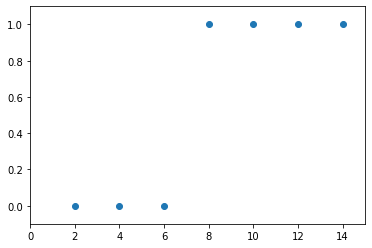

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# 공부시간 x와 성적 y의 리스트를 만듦
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 그래프로 나타냄.
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
plt.show()

In [3]:
# 기울기 a와 절편 b의 값을 초기화
a = 0
b = 0

# 학습률을 정함
lr = 0.05

# 시그모이드 함수를 정의
def sigmoid(x) :
    return 1 / (1 + np.e ** (-x))

# 경사 하강법을 실행
for i in tqdm(range(2001)) :
    for x_data, y_data in data :
        a_diff = x_data * (sigmoid(a*x_data + b) - y_data)
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0 :
            print(f"epoch={i}, slope={a:.3f}, intercept={b:.4f}")

100%|██████████| 2001/2001 [00:00<00:00, 166540.38it/s]

epoch=0, slope=-0.050, intercept=-0.0250
epoch=0, slope=-0.139, intercept=-0.0472
epoch=0, slope=-0.227, intercept=-0.0619
epoch=0, slope=0.120, intercept=-0.0185
epoch=0, slope=0.237, intercept=-0.0068
epoch=0, slope=0.270, intercept=-0.0040
epoch=0, slope=0.286, intercept=-0.0029
epoch=1000, slope=1.498, intercept=-9.9401
epoch=1000, slope=1.494, intercept=-9.9411
epoch=1000, slope=1.412, intercept=-9.9547
epoch=1000, slope=1.495, intercept=-9.9444
epoch=1000, slope=1.498, intercept=-9.9440
epoch=1000, slope=1.498, intercept=-9.9440
epoch=1000, slope=1.498, intercept=-9.9440
epoch=2000, slope=1.906, intercept=-12.9489
epoch=2000, slope=1.905, intercept=-12.9491
epoch=2000, slope=1.851, intercept=-12.9581
epoch=2000, slope=1.906, intercept=-12.9514
epoch=2000, slope=1.907, intercept=-12.9513
epoch=2000, slope=1.907, intercept=-12.9513
epoch=2000, slope=1.907, intercept=-12.9513


* 시그모이드 형태의 함수가 잘 만들어지도록 a와 b의 값이 수렴된 것을 알 수 있음.
* 만약 여기에 입력 값이 추가되어 세 개 이상의 입력 값을 다룬다면(__다중 분류 문제__) 시그모이드 함수가 아니라 __소프트맥스(softmax)__라는 함수를 써야 함
* Sigmoid에서 시작된 활성화 함수는 ReLU를 비롯해 다양한 종류가 있음.

### 6. 로지스틱 회귀에서 퍼셉트론으로
* 입력 값을 통해 출력 값을 구하는 함수 $y$는 다음과 같이 표현할 수 있음
$$y = a_1x_1 + a_2x_2 + b$$
  * 입력 값 : 우리가 가진 값인 $x_1, x_2$
  * 출력 값 : 계산으로 얻는 값 $y \rarr$ 출력 값 $y$를 구하려면 가중치(weight) $a_1$값, $a_2$값 그리고 편향(bias) $b$값이 필요함.
* $x_1$과 $x_2$가 입력되고, 각각 가중치 $a_1, a_2$를 만남. 여기에 $b$값을 더한 후 시그모이드 함수를 거쳐 1 또는 0의 출력값 $y$를 출력함.
* 프랑크 로젠플라트가 퍼셉트론(perceptron)이라는 이름을 붙임.
* 퍼셉트론은 이후 인공신경망(ANN), 오차 역전파 등의 발전을 거쳐 지금의 딥러닝으로 발전됨.